xxxxxxxxxx

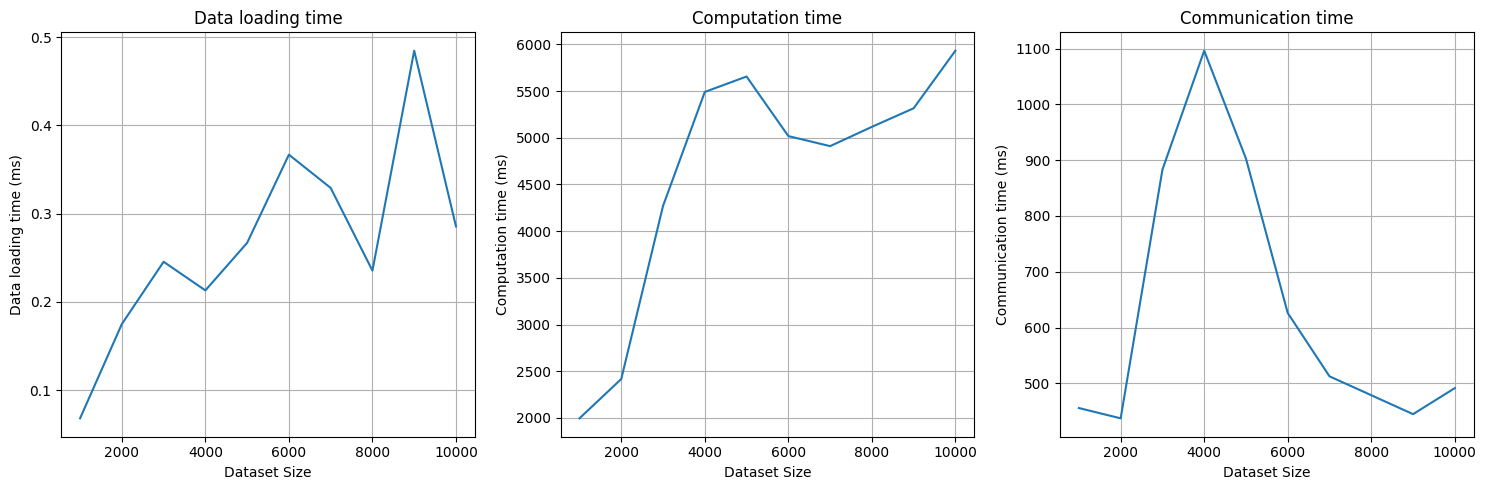

In [42]:
from helpers.bashrun import bashrun
from helpers.generate_data import generate_data
from helpers.plotPerformance import plotPerformance
from helpers.run_and_measure import run_and_measure
import time
import matplotlib.pyplot as plt
import numpy as np

# clean metadata files
bashrun("rm meta*.csv")

sample_sizes = []

for i in range(1000, 11000, 1000):
    print("x", end='')
    
    sample_sizes.append(i)

    n_samples = i
    # bashrun(f"python3 k-means.py {n_samples}")

    bashrun(f"mpirun -n 4 python3 parallel_km_final.py {n_samples}")


# Read the CSV file into a NumPy array
    # Row format
    # row --> data loading time, computation time, communication time
# data_seq = np.loadtxt('meta_seq.csv', delimiter=',', dtype=np.float32) * 1000 # *1000 makes it to ms
data_para = np.loadtxt('meta_para.csv', delimiter=',', dtype=np.float32) * 1000 # *1000 makes it to ms

plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(131)  # 1 row, 3 columns, 1st subplot
plt.title("Data loading time")
plt.plot(sample_sizes, data_para[:, 0], label='Parallel')
plt.grid()
plt.xlabel("Dataset Size")
plt.ylabel('Data loading time (ms)')


# Second subplot
plt.subplot(132)  # 1 row, 3 columns, 2nd subplot
plt.plot(sample_sizes, data_para[:, 1], label='Parallel')
plt.grid()
plt.xlabel("Dataset Size")
plt.ylabel('Computation time (ms)')
plt.title("Computation time")


# Third subplot
plt.subplot(133)  # 1 row, 3 columns, 3rd subplot
plt.title("Communication time")
plt.plot(sample_sizes, data_para[:, 2], label='Parallel')
plt.grid()
plt.xlabel("Dataset Size")
plt.ylabel('Communication time (ms)')


# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()




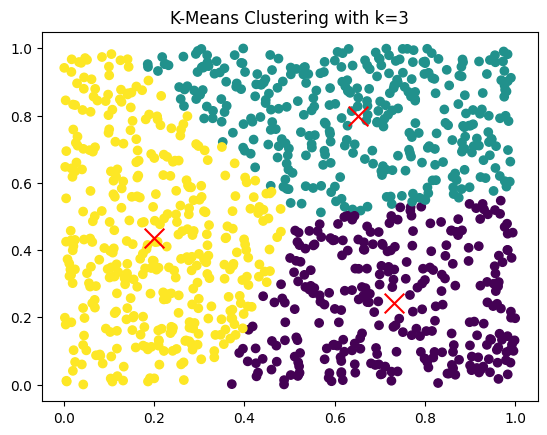

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points for demonstration
np.random.seed(0)
data = np.random.rand(1000, 2)

# Define the number of clusters (k)
k = 3

# Initialize cluster centroids randomly
init_centroids = data[np.random.choice(data.shape[0], k, replace=False)]

# Function to assign each data point to the nearest centroid
def assign_to_nearest_centroid(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Function to update the centroids based on the assigned points
def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iterations, tolerance, init_centroids):
    for i in range(max_iterations):
        labels = assign_to_nearest_centroid(data, init_centroids)
        new_centroids = update_centroids(data, labels, k)
    
        if np.all(np.abs(new_centroids - init_centroids) < tolerance):
            break
    
        init_centroids = new_centroids
    return init_centroids,labels

# Main k-means clustering loop
max_iterations = 100
tolerance = 1e-4
centroids = init_centroids


centroids, labels = kmeans(data, k, max_iterations, tolerance, centroids)

# Plot the data points and cluster centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.title(f'K-Means Clustering with k={k}')
plt.show()
